### Normal Distribution

In [2]:
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [27]:
palette = sns.color_palette()

In [3]:
# CDF: bell shape distribution
stats.norm.cdf(1.2) # Probability of a critical Z score 

0.8849303297782918

In [5]:
# Probability Point Function: what is the critical value (Z score) at a given probability (inverse of the PDF)
stats.norm.ppf(.885)

1.200358858030859

----

In [6]:
# Load the iris dataset
iris = sns.load_dataset('iris')
# Display the first few rows of the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
iris['sepal_width']

In [18]:
median = iris['sepal_width'].median()
mu = iris['sepal_width'].mean()
sigma = iris['sepal_width'].std()

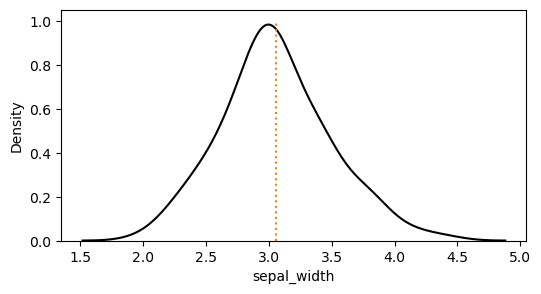

In [20]:
plt.figure(figsize=(6,3))
sns.kdeplot(data=iris,x='sepal_width',color='black');
plt.vlines(mu,0,1,color=sns.color_palette()[1],ls=':')
plt.show()

__1. What is the probability of finding a plant with a sepal width greater than 3.5 cm?__

In [21]:
1 - stats.norm.cdf(3.5,loc=mu,scale=sigma)

0.15490947825614976

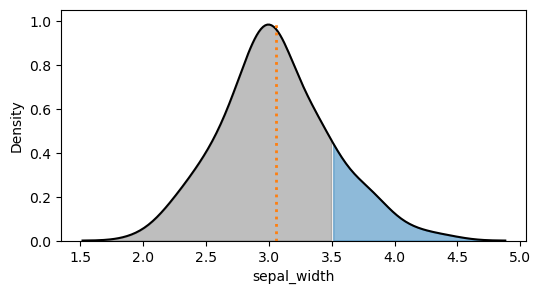

In [38]:
plt.figure(figsize=(6,3))
ax = sns.kdeplot(data=iris,x='sepal_width',color='black');
plt.vlines(mu,0,1,color=sns.color_palette()[1],ls=':',lw=2)
x, y = ax.lines[0].get_data()
plt.fill_between(x, y, where=(x >= 3.5), color=palette[0], alpha=0.5)
plt.fill_between(x, y, where=(x <= 3.5), color=palette[-3], alpha=0.5)
plt.show()

__2. What is the probability of a plant having a sepal width between 2 and 2.5 cm?__

In [42]:
stats.norm.cdf(2.5,loc=mu,scale=sigma) - stats.norm.cdf(2,loc=mu,scale=sigma)

0.092868037480509

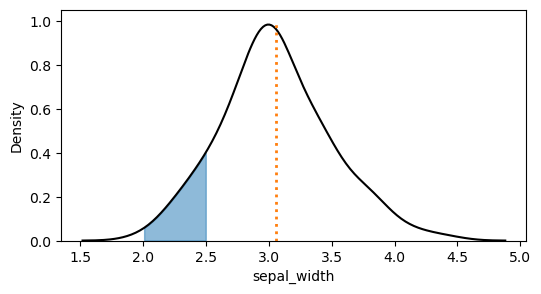

In [43]:
plt.figure(figsize=(6,3))
ax = sns.kdeplot(data=iris,x='sepal_width',color='black');
plt.vlines(mu,0,1,color=sns.color_palette()[1],ls=':',lw=2)
x, y = ax.lines[0].get_data()
plt.fill_between(x, y, where=(x >= 2) & (x <= 2.5), color=palette[0], alpha=0.5)
plt.show()

__3. What is the probability of a plant having a sepal width less than 2 cm?__

In [44]:
stats.norm.cdf(2,loc=mu,scale=sigma)

0.0076369130671588405

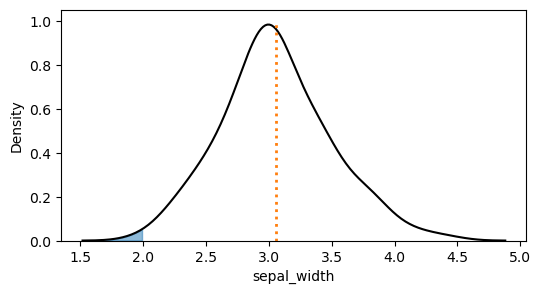

In [45]:
plt.figure(figsize=(6,3))
ax = sns.kdeplot(data=iris,x='sepal_width',color='black');
plt.vlines(mu,0,1,color=sns.color_palette()[1],ls=':',lw=2)
x, y = ax.lines[0].get_data()
plt.fill_between(x, y, where=(x <= 2), color=palette[0], alpha=0.5)
plt.show()

__4. What is the area range occupied by the smallest 25% of the sepal by width?__

In [46]:
stats.norm.ppf(0.25,loc=mu,scale=sigma)

2.763345991687486

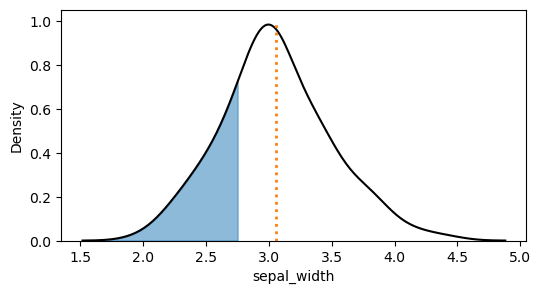

In [47]:
plt.figure(figsize=(6,3))
ax = sns.kdeplot(data=iris,x='sepal_width',color='black');
plt.vlines(mu,0,1,color=sns.color_palette()[1],ls=':',lw=2)
x, y = ax.lines[0].get_data()
plt.fill_between(x, y, where=(x <= 2.76), color=palette[0], alpha=0.5)
plt.show()

### Fitting the distribution

/var/folders/4m/7mpb_q5j65zdcnwbryv2_f8h0000gn/T/ipykernel_24714/3687987797.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris['sepal_width'],color='black',fit=stats.norm,kde=True,kde_kws={'color':palette[1]});


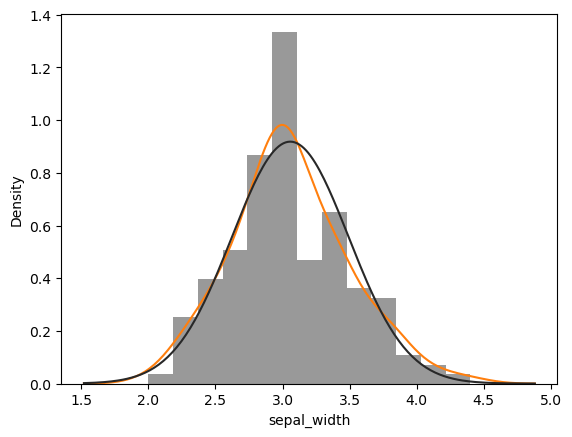

In [75]:
sns.distplot(iris['sepal_width'],color='black',fit=stats.norm,kde=True,kde_kws={'color':palette[1]});

In [80]:
# Estimated parameters
loc, scale = stats.norm.fit(iris['sepal_width'])
loc, scale

(3.0573333333333337, 0.4344109677354946)

In [78]:
# Real parameters
mu, sigma

(3.0573333333333337, 0.4358662849366982)

### PDF

In [81]:
import numpy as np

In [90]:
iris['sepal_width'].min()

2.0

In [91]:
x_linspace = np.linspace(start=1.5,stop=5,num=100)
pdf = stats.norm.pdf(x_linspace, loc=loc, scale=scale)

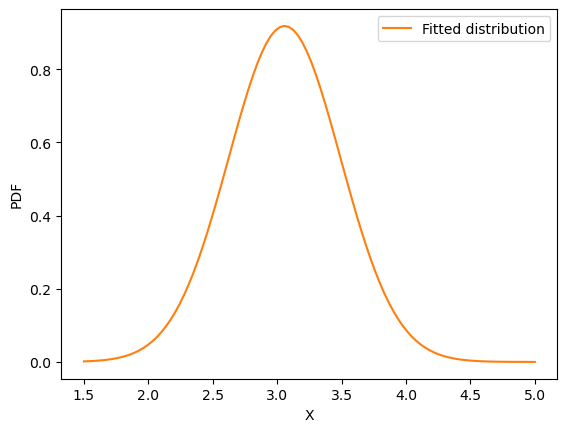

In [108]:
sns.lineplot(x=x_linspace,y=pdf,color=palette[1], label= 'Fitted distribution')
plt.legend()
plt.xlabel('X')
plt.ylabel('PDF')
plt.show()

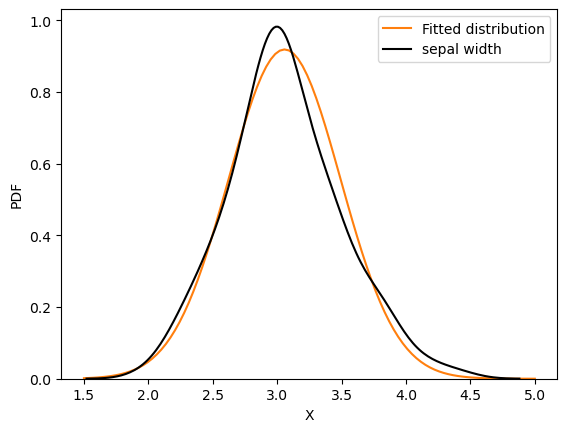

In [104]:
sns.lineplot(x=x_linspace,y=pdf,color=palette[1], label= 'Fitted distribution')
sns.kdeplot(data=iris,x='sepal_width',color='black', label= 'sepal width');
plt.legend()
plt.xlabel('X')
plt.ylabel('PDF')
plt.show()

## CDF

In [107]:
cdf = stats.norm.cdf(x_linspace,loc=loc,scale=scale)

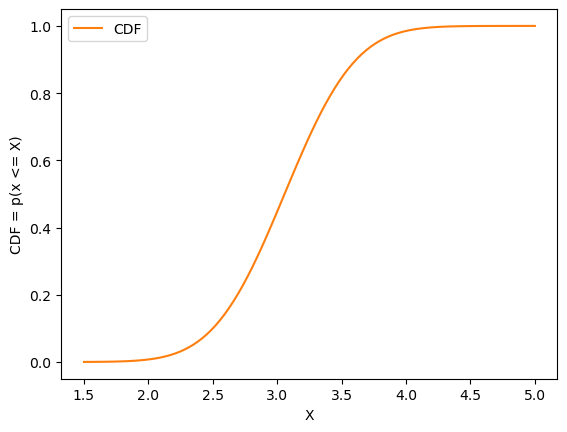

In [110]:
sns.lineplot(x=x_linspace,y=cdf,color=palette[1], label= 'CDF')
plt.legend()
plt.xlabel('X')
plt.ylabel('CDF = p(x <= X)')
plt.show()

probability that the variable X takes values lower than 2.

In [118]:
cdf_3 = stats.norm.cdf(3,loc=loc,scale=scale)
cdf_3

0.44750026144003163

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


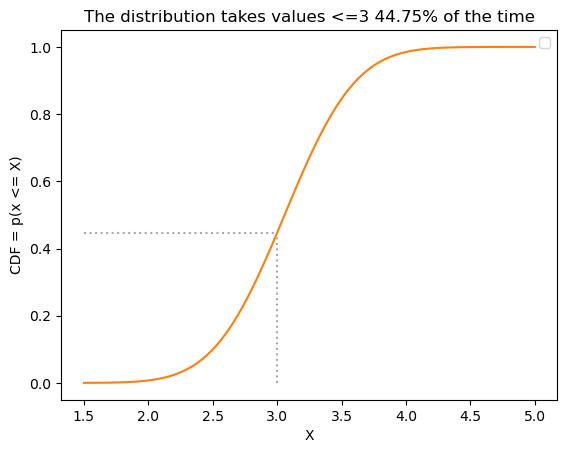

In [126]:
plt.title(f'The distribution takes values <=3 {100*cdf_3:.2f}% of the time')
sns.lineplot(x=x_linspace,y=cdf,color=palette[1])
plt.vlines(3,0,cdf_3, color='darkgray',ls=':')
plt.hlines(cdf_3,1.5,3, color='darkgray',ls=':')
plt.legend()
plt.xlabel('X')
plt.ylabel('CDF = p(x <= X)')
plt.show()

## PPF Probability Point Function

In [111]:
y_linspace = np.linspace(0,1,10000)
ppf = stats.norm.ppf(y_linspace,loc=loc,scale=scale)

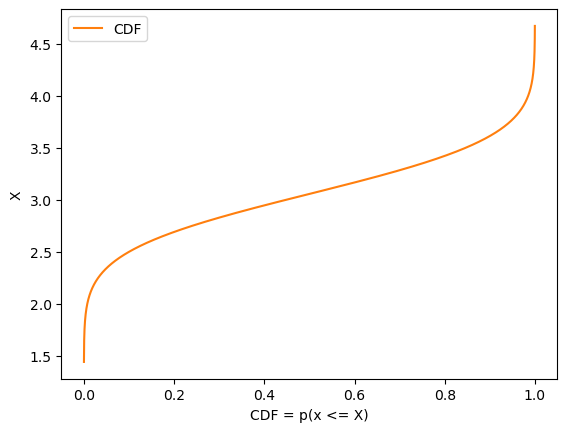

In [127]:
sns.lineplot(y=ppf,x=y_linspace,color=palette[1], label= 'PPF')
plt.legend()
plt.ylabel('X')
plt.xlabel('CDF = p(x <= X)')
plt.show()

What is the value of X that is not exceeded 80% of the time?

In [133]:
ppf_80 = stats.norm.ppf(0.8,loc=loc,scale=scale)
ppf_80

3.422942827876484

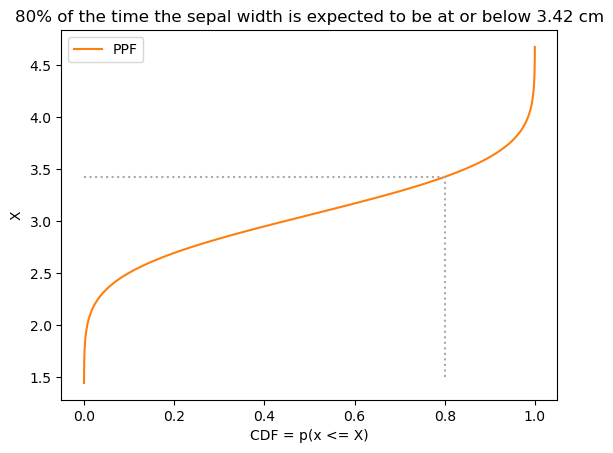

In [134]:
plt.title(f'80% of the time the sepal width is expected to be at or below {ppf_80:.2f} cm')

sns.lineplot(y=ppf,x=y_linspace,color=palette[1], label= 'PPF')

plt.hlines(ppf_80,0,0.8, color='darkgray',ls=':')
plt.vlines(0.8,1.5,ppf_80, color='darkgray',ls=':')

plt.ylabel('X')
plt.xlabel('CDF = p(x <= X)')
plt.show()